<a href="https://colab.research.google.com/github/utkarsh0702/Projects/blob/master/Image_Denoising_using_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

(60000, 28, 28)
(10000, 28, 28)


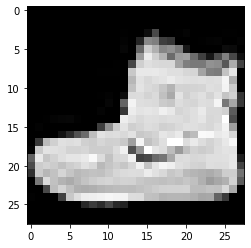

In [14]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.fashion_mnist.load_data()

plt.imshow(x_train[0], cmap='gray')
print(x_train.shape)
print(x_test.shape)

# Preprocessing data to create a noise dataset

In [15]:
x_train= x_train/ 255.
x_test= x_test/ 255.

#for training data
noise =0.3
noise_train_dataset=[]
noise_test_dataset=[]

for i in x_train:
  noisy_image= i+ noise*np.random.randn(*i.shape)
  noisy_image= np.clip(noisy_image, 0, 1)
  noise_train_dataset.append(noisy_image)

for i in x_test:
  noisy_image= i+ noise*np.random.randn(*i.shape)
  noisy_image= np.clip(noisy_image, 0, 1)
  noise_test_dataset.append(noisy_image)

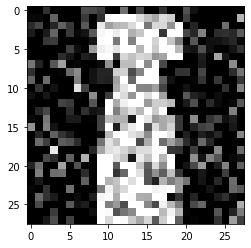

In [16]:
#images of noise data set
plt.imshow(noise_train_dataset[50], cmap='gray')
plt.show()

In [17]:
noise_train_dataset= np.array(noise_train_dataset)
noise_test_dataset= np.array(noise_test_dataset)

# Building the model

In [18]:
tf.keras.backend.clear_session()
autoencoder= tf.keras.models.Sequential([
                                         # encoder part
                                         tf.keras.layers.Conv2D(16, (3,3), strides=2, padding='same', input_shape=(28,28,1)),
                                         tf.keras.layers.Conv2D(8, (3,3), strides=2, padding='same'),
                                         tf.keras.layers.Conv2D(8, (3,3), padding='same'),

                                         # decoder part
                                         tf.keras.layers.Conv2DTranspose(16, (3,3), strides=2, padding='same'),
                                         tf.keras.layers.Conv2DTranspose(1, (3,3), strides=2, padding='same', activation='sigmoid')
])

#compiling the model
autoencoder.compile(loss='binary_crossentropy', optimizer= tf.keras.optimizers.Adam())

#summary of the model
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [19]:
autoencoder.fit(noise_train_dataset.reshape(-1, 28, 28, 1),
                x_train.reshape(-1, 28, 28, 1), 
                epochs=10, batch_size=200, 
                validation_data= (noise_test_dataset.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 2s 8ms/step - loss: 0.3962 - val_loss: 0.3251
Epoch 2/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3159 - val_loss: 0.3133
Epoch 3/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3087 - val_loss: 0.3091
Epoch 4/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3058 - val_loss: 0.3074
Epoch 5/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3044 - val_loss: 0.3062
Epoch 6/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3035 - val_loss: 0.3054
Epoch 7/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3029 - val_loss: 0.3051
Epoch 8/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3024 - val_loss: 0.3044
Epoch 9/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3019 - val_loss: 0.3038
Epoch 10/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3013 - val_loss: 0.3033

In [20]:
autoencoder.evaluate(noise_test_dataset.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1))

313/313 [==============================] - 1s 3ms/step - loss: 0.3033


0.3033200800418854

# Prediction

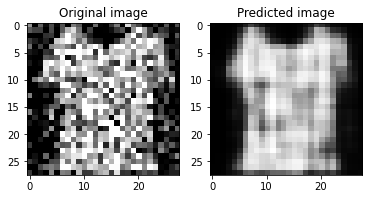

In [21]:
def predict_fun(n):
  image= noise_test_dataset[n]
  pred= autoencoder.predict(image.reshape(-1,28,28,1))
  fig, (ax1, ax2)= plt.subplots( 1 , 2 )
  ax1.imshow(image, cmap='gray')
  ax1.set_title('Original image')
  pred= pred.reshape(28,28)
  ax2.imshow(pred, cmap='gray')
  ax2.set_title('Predicted image')
  plt.show()

predict_fun(1000)